### This notebook shows the usage of the light curve package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from light_curve import create_lc, gp_interpolation

In [2]:
%config InlineBackend.figure_format ='retina'

In [3]:
# ===== SN at work ==== #
# ===================== #

# Details of the object under study

Object = 'SN2011aa'
Host = 'PGC021381'
RA = '07:36:42.63'
DEC = '+74:26:34.80'
z = 0.013
EB_V_Gal = 0.065              # Na ID around maximum (Turatto 2003)
EB_V_Gal_err = 0.003
EB_V_Host = 0.0               # Schlafly & Finkbeiner 2011
EB_V_Host_err = 0.0
DM = 33.75
DM_err = 0.27                 # modz  http://leda.univ-lyon1.fr/ledacat.cgi?o=PGC%20021381
JD_offset = 2455000   

In [4]:
object_dir = '/Users/anirbandutta/Documents/SN2011aa_Work/SN2011_Anirban/Photometry/'

optical_mag = object_dir + '2011aa_ubvri_mag'
uvoptical_mag = object_dir + '2011aa_uvot_mag'

In [5]:
# Find data files

# A filter file containing all the required information on bandpasses
FILTER_directory = '/Users/anirbandutta/Dropbox/astromatic/'            # Filter information 
FILTER_data = FILTER_directory+'FILTERS.dat'

#--------------------------------------------------#

In [6]:
# Read the filter file containing data on filters 

filter_df = pd.read_csv(FILTER_data, sep = '\s+')
filter_df = filter_df.replace('INDEF', np.nan).set_index(['FILTER', 'Marker', 'Color']).astype('float64')
filter_df = filter_df.reset_index().set_index('FILTER')
list_filters = filter_df.index.tolist()

In [7]:
# create a light curve class
lc = create_lc(optical_mag)

In [8]:
# Know your data  bit
# transform from your data table from a wide format to long format
sn_df = lc.column_to_row(offset = 2455000.0)
sn_df = sn_df[sn_df['MAG'] != 99.99]
print (sn_df)

              JD FILTER     MAG   MERR
0    2455601.327      U  14.696  0.033
1    2455602.413      U  14.549  0.069
2    2455603.352      U  14.478  0.016
3    2455604.220      U  14.415  0.032
5    2455610.188      U  14.201  0.069
..           ...    ...     ...    ...
183  2455681.221      I  16.201  0.017
184  2455685.164      I  16.401  0.017
185  2455694.115      I  16.833  0.018
186  2455701.095      I  17.089  0.014
188  2455726.122      I  18.398  0.032

[175 rows x 4 columns]


In [9]:
# interpolate the B-band to know the B-band maximum, JD at maximum
interp = gp_interpolation(sn_df, 'B', supernova='SN2011aa')

You are working on SN2011aa
The following are the interpolated values for the band B 
JD at maximum = 2455611.646776 
Mag at maximum = 14.715972 +/- 0.008434
dm15 = 0.593009 +/- 0.013154


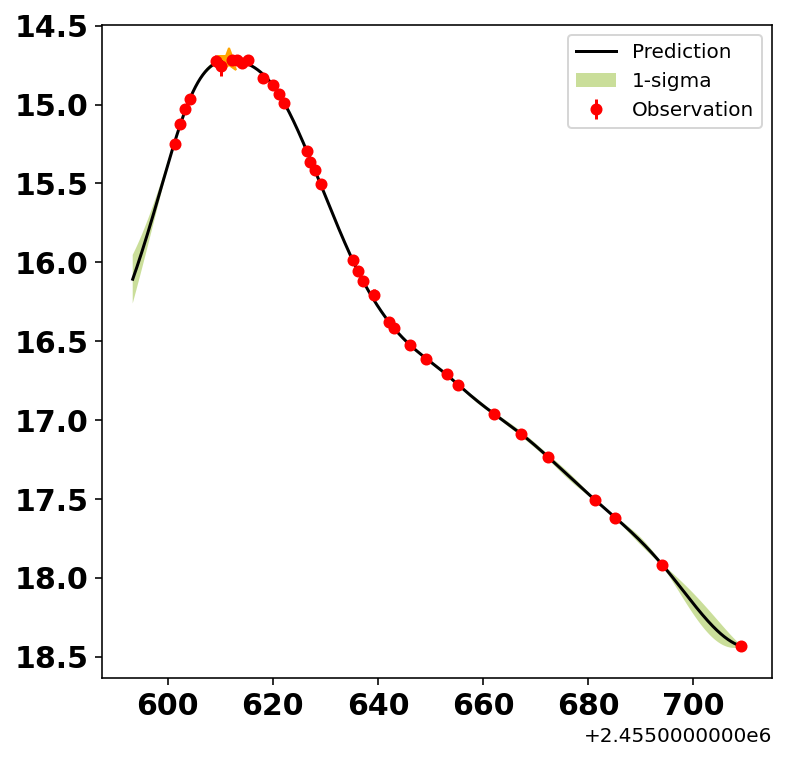

In [10]:
# Parameters of gp fit.
params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
                              find_two_peaks=False)

In [11]:
# get the rest frame df 
# (t-t0)/(1+z) to first order
rest_frame_df = lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')
rest_frame_df = rest_frame_df[rest_frame_df['MAG'] != 99.99]

In [12]:
# plot the light curves
uv_lc = create_lc(uvoptical_mag)

In [13]:
uvsn_df = uv_lc.column_to_row(offset=2400000)

In [14]:
uvsn_df = uvsn_df[uvsn_df['MAG'] != 99.99]
print (uvsn_df)

            JD FILTER    MAG  MERR
0   2455603.66   uvw2  16.20  0.05
1   2455605.91   uvw2  16.22  0.05
2   2455607.08   uvw2  16.13  0.05
3   2455609.95   uvw2  16.39  0.05
4   2455611.23   uvw2  16.19  0.05
..         ...    ...    ...   ...
85  2455635.07    uvv  15.25  0.05
86  2455637.27    uvv  15.44  0.05
87  2455640.25    uvv  15.59  0.07
88  2455649.14    uvv  15.54  0.06
89  2455657.70    uvv  15.79  0.08

[90 rows x 4 columns]


In [19]:
# interpolate the B-band to know the B-band maximum, JD at maximum
interp = gp_interpolation(uvsn_df, 'uvb', supernova='SN2011aa')

You are working on SN2011aa
The following are the interpolated values for the band uvb 
JD at maximum = 2455612.551772 
Mag at maximum = 14.796486 +/- 0.019790
dm15 = 0.611526 +/- 0.049714


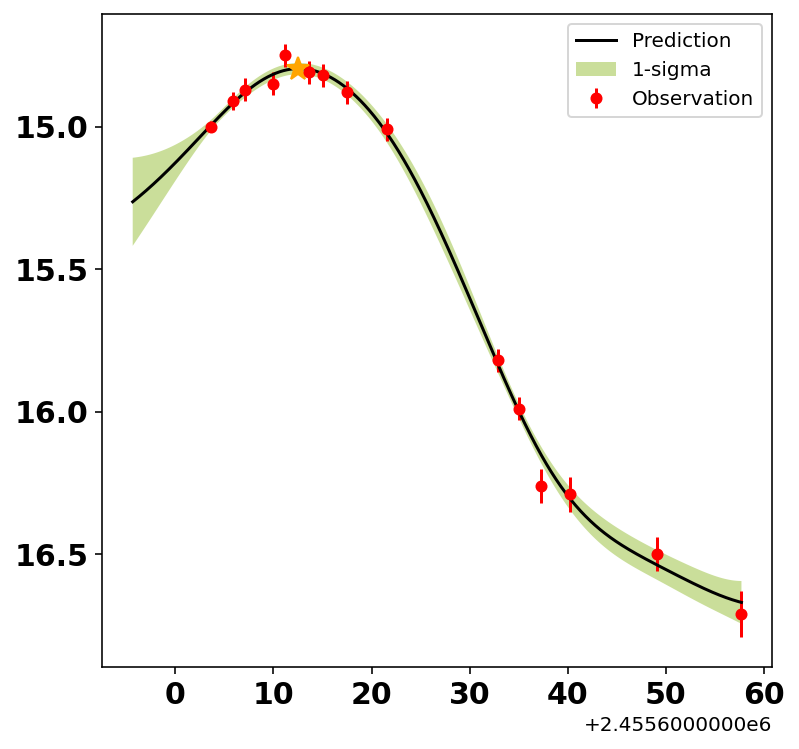

In [20]:
# Parameters of gp fit.
params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
                              find_two_peaks=False)

In [23]:
uv_rest_frame_df = uv_lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')

(23.0, 12.0)

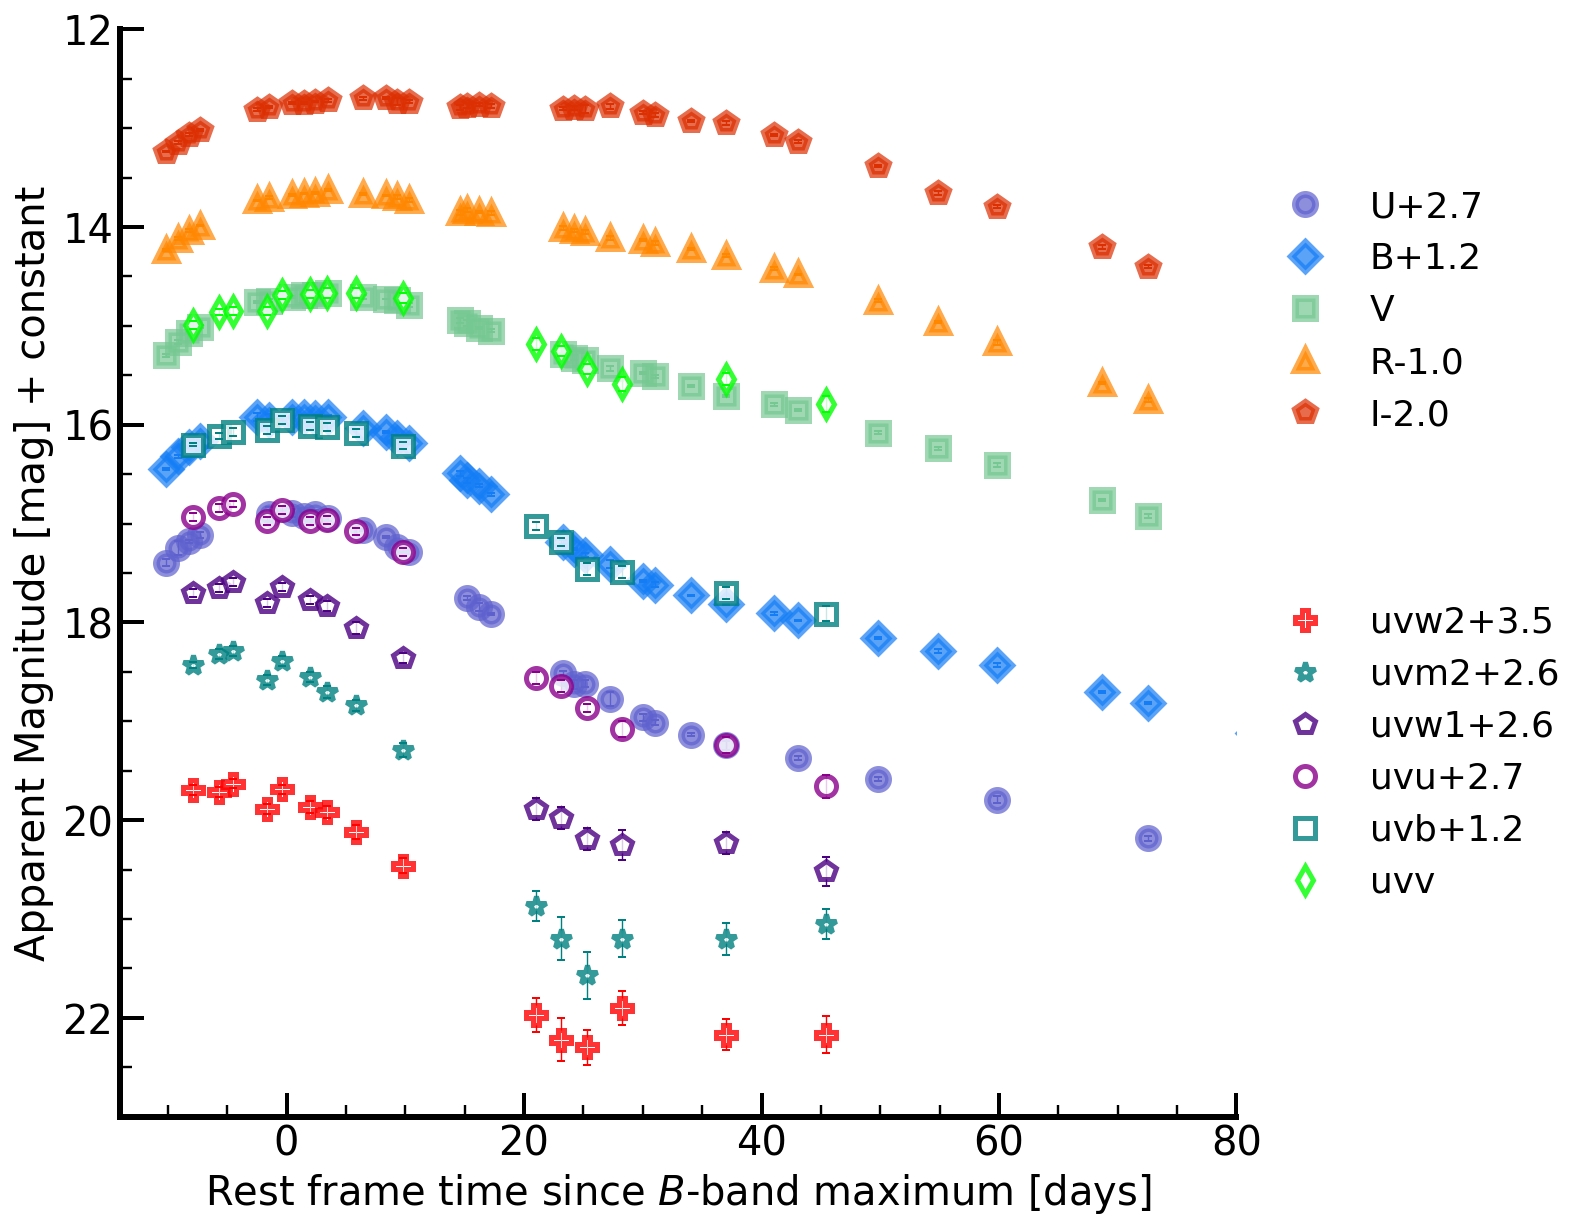

In [38]:
fig_app = plt.figure(figsize = (10, 10))
ax = fig_app.add_subplot(111)
uv_lc.plot_params(ax, ml_x = 20, mil_x = 5, ml_y = 2, mil_y = 0.5, invert=True)
legend_properties = {'size':18, 'weight':'book'}
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.linewidth'] = 3
ax.set_ylim(21.0, 11.5)

#-----------------------------------------------------------------------------------------------#
## UBVRI photometry dataframe

offset = [+1.2, -2.0, -1.0, +2.7, +0.0]
str_offset = ['+1.2', '-2.0', '-1.0 ', '+2.7', ' ']
i = 0
line1 =[]
for band, band_df in rest_frame_df.groupby('FILTER'):
    line1 += ax.plot(band_df['Phase'], band_df['MAG']+offset[i], mfc = filter_df.loc[band, 'Color'],
                    mec = filter_df.loc[band, 'Color'], markeredgewidth=3.5, 
                    marker = filter_df.loc[band, 'Marker'],  markersize = 10,
                    alpha = 0.7, label = str(band) + str_offset[i], ls = ' ')
                    
    ax.errorbar(band_df['Phase'], band_df['MAG']+offset[i], yerr = band_df['MERR'], fmt = '',
                c = filter_df.loc[band, 'Color'], ls = '', lw = 0.7, capsize=2, capthick=1)
    
    line1.append(line1)
    
    i = i+1
    
handles_1,labels_1 = ax.get_legend_handles_labels()    
handles_1 = [handles_1[3], handles_1[0], handles_1[4], handles_1[2], handles_1[1]]
labels_1 = [labels_1[3], labels_1[0], labels_1[4], labels_1[2], labels_1[1]]
legend_1 = ax.legend(handles_1,labels_1, frameon= False, 
                     fancybox = False, shadow = False, framealpha=0.3, facecolor = 'white', 
                     prop = legend_properties, bbox_to_anchor=(1.0, 0.6))

ax.add_artist(legend_1)

#-----------------------------------------------------------------------------------------------#
## Swift-UVOT dataframe

offset = [+1.2, +2.6, +2.7, 0.0, +2.6, +3.5]
str_offset = ['+1.2', '+2.6', '+2.7', ' ', '+2.6', '+3.5']
i = 0
line2 = []
for band, band_df in uv_rest_frame_df.groupby('FILTER'):
        
        line2 += ax.plot(band_df['Phase'], band_df['MAG']+offset[i], mfc = 'white', 
                     marker = filter_df.loc[band.lower(), 'Marker'], markersize = 10, label = str(band.lower()) + str_offset[i], ls =' ',
                     markeredgecolor = filter_df.loc[band.lower(), 'Color'], markeredgewidth=2.5, 
                        alpha =0.8)
        ax.errorbar(band_df['Phase'], band_df['MAG']+offset[i], yerr=band_df['MERR'], fmt='',
                    c=filter_df.loc[band.lower(), 'Color'], ls='', lw=0.7, capsize=2, capthick=1,
                   label = str(band.lower()) + str_offset[i])

        i = i+1
    

labels_2 = [l.get_label() for l in line2]
line2 = [line2[5], line2[1], line2[4], line2[2], line2[0], line2[3]]
labels_2 = [labels_2[5], labels_2[1], labels_2[4], labels_2[2], labels_2[0], labels_2[3]]
legend_2 = ax.legend(line2, labels_2, frameon= False, 
                     fancybox = False, framealpha =0.3, shadow = False, facecolor = 'white', 
                     prop = legend_properties, bbox_to_anchor=(1.0, 0.5), numpoints =1)  



ax.set_xlabel(r'Rest frame time since $B$-band maximum [days]', fontsize = 20)
ax.set_ylabel('Apparent Magnitude [mag] + constant', fontsize = 20)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

ax.set_xlim(-14, 80)
ax.set_ylim(23.0, 12.0)